<a href="https://colab.research.google.com/github/thanhnhan311201/CS114.L11.KHCL/blob/master/PreprocessingAndSplitData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Dataset

/content/drive/MyDrive/Dataset


In [ ]:
!unzip HandWrittenData.zip

In [ ]:
folder = '/content/drive/MyDrive/Dataset/Dataset'


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [ ]:
print(sorted(os.listdir(folder)))

['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']


In [ ]:
list_char = (sorted(os.listdir(folder)))
print(list_char)
print(len(list_char))

['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']
89


In [ ]:
FJoin = os.path.join

# Duyệt tất cả các ảnh để lấy và thống kê kích thước của các ảnh 

In [ ]:
size = []
char_link = [FJoin(folder, f) for f in list_char]
for link in char_link:
    for img_id in os.listdir(link):
        img = Image.open(FJoin(link, img_id))
        size.append(img.size)
print(size)

In [ ]:
df = pd.DataFrame(size, columns=['width', 'height'])
df.describe()

,width,height
count,14849.000000,14849.000000
mean,54.695400,63.144589
std,1.809921,3.832942
min,52.000000,58.000000
25%,52.000000,58.000000
50%,56.000000,66.000000
75%,56.000000,66.000000
max,58.000000,68.000000


- Chiều rộng nhỏ nhất của ảnh : 52 
- Chiều dài nhỏ nhất của ảnh : 58 

=> Ta resize tất cả các ảnh về  kích thước nhỏ nhất (52, 58) 

In [ ]:
for link in char_link:
    for img_id in os.listdir(link):
        img = Image.open(FJoin(link, img_id))
        img = img.resize((52, 58));
        img.save(FJoin(link, img_id))

# Crop và grayscale ảnh:

- Do khi cắt ảnh có sai sót nên một số ảnh bị dính viền đen như hình bên dưới 

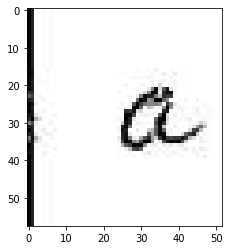

In [ ]:
img = Image.open(FJoin(char_link[0], '7103.jpg'))
plt.imshow(img)

- Nhóm quyết định crop và grayscale ảnh để đường viền đen này ít xuất hiện hơn

In [ ]:
print(char_link)

['/content/drive/MyDrive/Dataset/Dataset/a', '/content/drive/MyDrive/Dataset/Dataset/à', '/content/drive/MyDrive/Dataset/Dataset/á', '/content/drive/MyDrive/Dataset/Dataset/â', '/content/drive/MyDrive/Dataset/Dataset/ầ', '/content/drive/MyDrive/Dataset/Dataset/ấ', '/content/drive/MyDrive/Dataset/Dataset/ẫ', '/content/drive/MyDrive/Dataset/Dataset/ẩ', '/content/drive/MyDrive/Dataset/Dataset/ã', '/content/drive/MyDrive/Dataset/Dataset/ă', '/content/drive/MyDrive/Dataset/Dataset/ằ', '/content/drive/MyDrive/Dataset/Dataset/ắ', '/content/drive/MyDrive/Dataset/Dataset/ẵ', '/content/drive/MyDrive/Dataset/Dataset/ẳ', '/content/drive/MyDrive/Dataset/Dataset/ả', '/content/drive/MyDrive/Dataset/Dataset/ạ', '/content/drive/MyDrive/Dataset/Dataset/ậ', '/content/drive/MyDrive/Dataset/Dataset/ặ', '/content/drive/MyDrive/Dataset/Dataset/b', '/content/drive/MyDrive/Dataset/Dataset/c', '/content/drive/MyDrive/Dataset/Dataset/d', '/content/drive/MyDrive/Dataset/Dataset/e', '/co

In [ ]:
for f in char_link:
    list_img_link = [FJoin(f, img_link) for img_link in os.listdir(f)]
    for img_link in list_img_link:
        img = Image.open(img_link)
        img = img.crop((3, 3, 50, 56)).convert('1')
        img.save(img_link)

- Ảnh sau khi crop và grayscale 

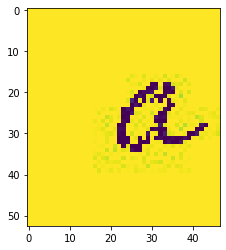

In [ ]:
img = Image.open(FJoin(char_link[0], '7103.jpg'))
plt.imshow(img)

# Phân chia tập train và validation:

- Để sau này có thể cải tiến model chính xác hơn cũng như tiết kiệm thời gian khi code chia dữ liệu để train và đánh giá, nhóm quyết định chia data ra làm 2 bộ test và validation với tỉ lệ test:validation mỗi class là 8:2

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
index = 0
link_train = {}
link_val = {}

label_train = []
label_val = []

for f in char_link:
    list_img_link = [img_link for img_link in os.listdir(f)]
    labels= [index] * len(list_img_link)
    train, validation , train_label, val_label = train_test_split(list_img_link, labels, test_size = 0.2, random_state= 30)

    link_train[index] = []
    link_val[index] = []
    for i, j in zip(train, train_label):
        link_train[index].append(i)
        label_train.append(j)
        
    for i, j in zip(validation, val_label):
        link_val[index].append(i)
        label_val.append(j) 
    print(index, len(train), len(val_label))
    index += 1
        

In [ ]:
print(link_train)
print(label_train)

In [ ]:
train_folder = '/content/drive/MyDrive/Dataset/train'
train_folder_character = [FJoin(train_folder, f) for f in list_char]
print(train_folder_character)

In [ ]:
for f in train_folder_character:
    os.makedirs(f)

In [ ]:
for i in range(89): #duyet tat ca class
    list_img = [FJoin(char_link[i], f) for f in link_train[i]] # lay link nhung anh dung de train
    save_path = [FJoin(train_folder_character[i],f) for f in link_train[i]]
    for link_open, link_save in zip(list_img, save_path):
        img = Image.open(link_open)
        img.save(link_save)


In [ ]:
val_folder = '/content/drive/MyDrive/Dataset/validation'
val_folder_character = [FJoin(val_folder, f) for f in list_char]
print(val_folder_character)

In [ ]:
for f in val_folder_character:
    os.makedirs(f)

In [ ]:
for i in range(89): #duyet tat ca class
    list_img = [FJoin(char_link[i], f) for f in link_val[i]] # lay link nhung anh dung de train
    save_path = [FJoin(val_folder_character[i],f) for f in link_val[i]]
    for link_open, link_save in zip(list_img, save_path):
        img = Image.open(link_open)
        img.save(link_save)
